<a href="https://colab.research.google.com/github/arssite/Datalysis/blob/main/GRU_deep_rnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 faqs="""About the Program
What is the course fee for  Data Science Mentorship Program (DSMP 2023)
The course follows a monthly subscription model where you have to make monthly payments of Rs 799/month.
What is the total duration of the course?
The total duration of the course is 7 months. So the total course fee becomes 799*7 = Rs 5600(approx.)
What is the syllabus of the mentorship program?
We will be covering the following modules:
Python Fundamentals
Python libraries for Data Science
Data Analysis
SQL for Data Science
Maths for Machine Learning
ML Algorithms
Practical ML
MLOPs
Case studies
You can check the detailed syllabus here - https://learnwith.campusx.in/courses/CampusX-Data-Science-Mentorship-Program-637339afe4b0615a1bbed390
Will Deep Learning and NLP be a part of this program?
No, NLP and Deep Learning both are not a part of this program’s curriculum.
What if I miss a live session? Will I get a recording of the session?
Yes all our sessions are recorded, so even if you miss a session you can go back and watch the recording.
Where can I find the class schedule?
Checkout this google sheet to see month by month time table of the course - https://docs.google.com/spreadsheets/d/16OoTax_A6ORAeCg4emgexhqqPv3noQPYKU7RJ6ArOzk/edit?usp=sharing.
What is the time duration of all the live sessions?
Roughly, all the sessions last 2 hours.
What is the language spoken by the instructor during the sessions?
Hinglish
How will I be informed about the upcoming class?
You will get a mail from our side before every paid session once you become a paid user.
Can I do this course if I am from a non-tech background?
Yes, absolutely.
I am late, can I join the program in the middle?
Absolutely, you can join the program anytime.
If I join/pay in the middle, will I be able to see all the past lectures?
Yes, once you make the payment you will be able to see all the past content in your dashboard.
Where do I have to submit the task?
You don’t have to submit the task. We will provide you with the solutions, you have to self evaluate the task yourself.
Will we do case studies in the program?
Yes.
Where can we contact you?
You can mail us at nitish.campusx@gmail.com
Payment/Registration related questions
Where do we have to make our payments? Your YouTube channel or website?
You have to make all your monthly payments on our website. Here is the link for our website - https://learnwith.campusx.in/
Can we pay the entire amount of Rs 5600 all at once?
Unfortunately no, the program follows a monthly subscription model.
What is the validity of monthly subscription? Suppose if I pay on 15th Jan, then do I have to pay again on 1st Feb or 15th Feb
15th Feb. The validity period is 30 days from the day you make the payment. So essentially you can join anytime you don’t have to wait for a month to end.
What if I don’t like the course after making the payment. What is the refund policy?
You get a 7 days refund period from the day you have made the payment.
I am living outside India and I am not able to make the payment on the website, what should I do?
You have to contact us by sending a mail at nitish.campusx@gmail.com
Post registration queries
Till when can I view the paid videos on the website?
This one is tricky, so read carefully. You can watch the videos till your subscription is valid. Suppose you have purchased subscription on 21st Jan, you will be able to watch all the past paid sessions in the period of 21st Jan to 20th Feb. But after 21st Feb you will have to purchase the subscription again.
But once the course is over and you have paid us Rs 5600(or 7 installments of Rs 799) you will be able to watch the paid sessions till Aug 2024.
Why lifetime validity is not provided?
Because of the low course fee.
Where can I reach out in case of a doubt after the session?
You will have to fill a google form provided in your dashboard and our team will contact you for a 1 on 1 doubt clearance session
If I join the program late, can I still ask past week doubts?
Yes, just select past week doubt in the doubt clearance google form.
I am living outside India and I am not able to make the payment on the website, what should I do?
You have to contact us by sending a mail at nitish.campusx@gmai.com
Certificate and Placement Assistance related queries
What is the criteria to get the certificate?
There are 2 criterias:
You have to pay the entire fee of Rs 5600
You have to attempt all the course assessments.
I am joining late. How can I pay payment of the earlier months?
You will get a link to pay fee of earlier months in your dashboard once you pay for the current month.
I have read that Placement assistance is a part of this program. What comes under Placement assistance?
This is to clarify that Placement assistance does not mean Placement guarantee. So we dont guarantee you any jobs or for that matter even interview calls. So if you are planning to join this course just for placements, I am afraid you will be disappointed. Here is what comes under placement assistance
Portfolio Building sessions
Soft skill sessions
Sessions with industry mentors
Discussion on Job hunting strategies
"""

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [3]:
token = Tokenizer()

In [4]:
token.fit_on_texts([faqs])

In [5]:
len(token.word_index)

282

In [6]:
input_sequence = []
for i in faqs.split('\n'):
  tokenized_sentence = token.texts_to_sequences([i])[0]
  for j in range(1,len(tokenized_sentence)):
    input_sequence.append(tokenized_sentence[:j+1])

In [7]:
len(input_sequence
    )

863

In [8]:
max_sequence = max([len(x) for x in input_sequence])
print(max_sequence)

57


In [9]:
padded_input_sequence = pad_sequences(input_sequence, maxlen=max_sequence,padding='pre')


In [10]:
padded_input_sequence

array([[  0,   0,   0, ...,   0,  93,   1],
       [  0,   0,   0, ...,  93,   1,  13],
       [  0,   0,   0, ...,   0,  11,   7],
       ...,
       [  0,   0,   0, ..., 279,  18, 280],
       [  0,   0,   0, ...,  18, 280, 281],
       [  0,   0,   0, ..., 280, 281, 282]], dtype=int32)

In [11]:
X=padded_input_sequence[:,:-1]

In [12]:
y=padded_input_sequence[:,-1]

In [13]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y,num_classes=283)


In [14]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential


In [15]:
model = Sequential()
model.add(Embedding(283,100,input_length=56))
model.add(GRU(100))
model.add(Dense(283,activation="softmax"))

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 56, 100)           28300     
                                                                 
 gru (GRU)                   (None, 100)               60600     
                                                                 
 dense (Dense)               (None, 283)               28583     
                                                                 
Total params: 117483 (458.92 KB)
Trainable params: 117483 (458.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.fit(X,y,epochs=100,verbose=0)

In [19]:
import numpy as np
import time
text="what is the fee"
for i in range(10):
  token_text=token.texts_to_sequences([text])[0]
  padded_token_text=pad_sequences([token_text],maxlen=56,padding='pre')
  pos=np.argmax(model.predict(padded_token_text))
  for word,index in token.word_index.items():
    if index==pos:
      text=text+" "+word
      print(text)
      time.sleep(2)

1/1 [==============================] - 0s 418ms/step
what is the fee of
1/1 [==============================] - 0s 22ms/step
what is the fee of monthly
1/1 [==============================] - 0s 24ms/step
what is the fee of monthly subscription
1/1 [==============================] - 0s 22ms/step
what is the fee of monthly subscription suppose
1/1 [==============================] - 0s 32ms/step
what is the fee of monthly subscription suppose if
1/1 [==============================] - 0s 25ms/step
what is the fee of monthly subscription suppose if i
1/1 [==============================] - 0s 22ms/step
what is the fee of monthly subscription suppose if i pay
1/1 [==============================] - 0s 22ms/step
what is the fee of monthly subscription suppose if i pay on
1/1 [==============================] - 0s 22ms/step
what is the fee of monthly subscription suppose if i pay on 15th
1/1 [==============================] - 0s 41ms/step
what is the fee of monthly subscription suppose if i pay on

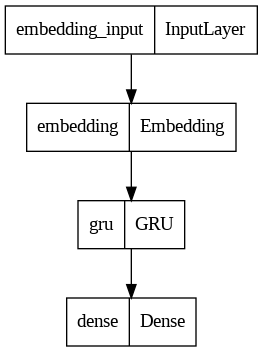

In [20]:
from keras.utils import plot_model
plot_model(model)